In [98]:
import pandas as pd
import numpy as np

In [99]:
# Load from URL (Kaggle or GitHub dataset URL)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

In [100]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
#population mean and variance
print(data['Fare'].mean())
print(data['Fare'].var())

32.204207968574636
2469.436845743117


<Axes: ylabel='Density'>

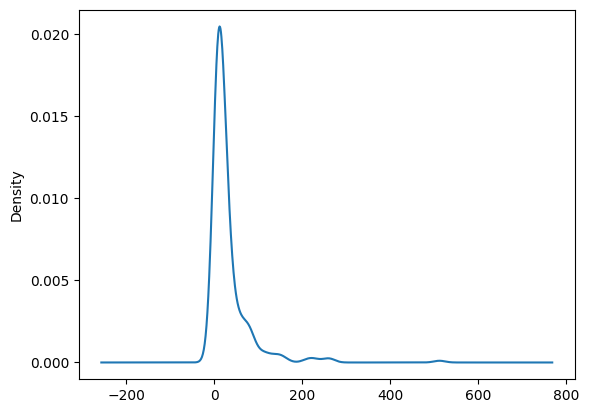

In [103]:
data['Fare'].plot(kind='kde')

In [104]:
#  sample size = 30 --> 10 times

samples = []
stds = [] #list of sample std

for i in range(10):
  x = data['Fare'].dropna().sample(30).values
  # print(i, x)
  stds.append(x.std())
  samples.append(x.tolist())

In [105]:
print(len(stds), stds)
print(len(samples), samples)

10 [np.float64(44.50390295128944), np.float64(56.92549315073169), np.float64(18.62340243393421), np.float64(16.94266965210881), np.float64(21.458142923851902), np.float64(21.186312256234373), np.float64(58.49374525983895), np.float64(53.63602987161201), np.float64(42.20763500229629), np.float64(31.652467996449605)]
10 [[0.0, 7.55, 13.0, 19.2583, 134.5, 27.7208, 26.25, 29.125, 25.9292, 7.2292, 7.65, 7.775, 27.75, 10.5, 15.85, 9.5, 52.0, 33.5, 7.8792, 12.65, 52.0, 20.2125, 13.0, 19.2583, 227.525, 29.7, 7.7958, 6.75, 26.55, 73.5], [29.125, 262.375, 13.0, 8.6625, 76.7292, 8.05, 7.8958, 18.7875, 20.525, 6.75, 7.75, 151.55, 77.9583, 89.1042, 14.4583, 7.0542, 8.05, 13.0, 10.5, 49.5042, 146.5208, 4.0125, 8.05, 53.1, 35.5, 7.25, 7.8875, 7.25, 13.0, 7.05], [8.05, 8.05, 26.55, 7.65, 7.775, 13.0, 26.0, 86.5, 52.0, 26.0, 7.7375, 26.0, 51.8625, 9.0, 6.8583, 5.0, 9.8417, 53.1, 7.8958, 7.25, 7.75, 30.0708, 15.2458, 8.05, 13.0, 8.6542, 13.0, 7.925, 7.225, 26.0], [14.4542, 25.4667, 13.0, 41.5792, 39.6, 

In [106]:
samples = np.array(samples)
# samples

In [107]:
sampling_means = samples.mean(axis=1)
print(len(sampling_means), sampling_means)

10 [31.73027667 39.015      19.43472    23.25388667 20.49472333 23.71
 40.78708    41.48027667 27.80764    25.15222   ]


In [108]:
sample_std = np.mean(stds)
sample_std

np.float64(36.56298014983473)

In [109]:
t_val = 1.699
lower_lt = sampling_means.mean() - t_val*(sample_std/np.sqrt(30))
upper_lt = sampling_means.mean() + t_val*(sample_std/np.sqrt(30))

In [110]:
print(f"The range is : [{lower_lt} -> {upper_lt}]") #95% confident when t_val = 1.699

The range is : [17.944982024314967 -> 40.628182642351696]


In [111]:
data['Fare'].mean()

np.float64(32.204207968574636)